# CNN Model


# 1. Import Libraries.

In this section we Import some of the initial Libraries we will need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


# 2. Lets use our Classifier dataset for this model.

"X_Ylabels_17_21.csv"

Binary labels for the years 2017 to 2021 signifying whether each stock outperformed (1) or underperformed (0) the equal weighted Nasdaq 100 that year.

See: https://github.com/SheepBoss/Project-on-ML-dataset-and-models-for-stock-performance-predictions-based-on-financial-ratios/blob/main/ML_dataset_for%20Nasdaq100stocks_financial%20ratios_with%20labels.ipynb


In [2]:
X_Y = pd.read_csv("X_Ylabels_17_21.csv")
X_Y



,asset_turnover,buyback_yield,capex_to_revenue,cash_ratio,cash_to_debt,cogs_to_revenue,mscore,zscore,current_ratio,days_inventory,...,price_to_earnings_ratio_nri,price_earnings_growth_ratio,price_to_free_cashflow,price_to_operating_cashflow,rate_of_return,scaled_net_operating_assets,yoy_ebitda_growth,yoy_eps_growth,yoy_revenue_growth,0
0,0.660000,4.090000,0.050000,0.740000,0.640000,0.620000,-2.500000,3.620000,1.280000,9.040000,...,16.730000,1.250000,15.630000,12.600000,19.240000,0.550000,9.360000,10.830000,11.340000,0
1,0.724932,2.035574,0.040000,1.410274,2.648413,0.250000,-2.543382,6.686479,2.332192,89.855094,...,44.909524,10.936250,33.836721,35.271493,14.260952,0.482917,26.097361,46.020147,19.277917,0
2,0.540000,1.080000,0.020000,1.650000,3.090000,0.140000,-2.490000,10.810000,2.050000,89.855094,...,52.320000,2.420000,32.410000,30.420000,21.820000,0.360000,39.030000,45.690000,25.510000,1
3,0.360000,0.140000,0.040000,0.660000,0.130000,0.400000,-1.490000,2.640000,1.470000,81.440000,...,39.870000,4.440000,33.680000,27.720000,11.950000,2.130000,25.600000,-17.030000,36.640000,0
4,0.724932,2.035574,0.086892,1.410274,2.648413,0.437534,-2.543382,6.686479,2.332192,89.855094,...,44.909524,10.936250,33.836721,35.271493,14.260952,0.482917,26.097361,46.020147,19.277917,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.570000,0.250000,0.010000,0.050000,0.040000,0.790000,-2.260000,2.720000,0.720000,28.090000,...,22.070000,6.195821,10.530000,7.910000,-5.110000,0.640000,65.800000,463.460000,10.370000,0
506,0.560000,1.733289,0.060000,0.830000,1.580000,0.280000,-3.240000,6.120000,1.120000,83.647794,...,63.153488,6.195821,53.290000,42.510000,12.240260,0.290000,156.700000,43.870000,14.100000,0
507,0.240000,-0.990000,0.320000,0.030000,0.010000,0.610000,-1.792316,1.030000,0.840000,26.040000,...,22.870000,8.730000,52.026374,16.700000,-1.040000,0.750000,3.480000,6.090000,13.930000,1
508,0.810000,-1.810000,0.030000,3.370000,40.040000,0.310000,-0.480000,47.500000,3.800000,83.647794,...,165.360000,6.195821,80.070000,75.390000,12.240260,-0.220000,17.709700,52.306596,263.130000,0


# Model: Convolutional Neural Network

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers, Sequential, optimizers, metrics
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import os
import tempfile
import json
import glob
import pathlib
from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.metrics
import random
import collections

# Methodology: Shuffle and Split the data into X and y



In [5]:
df_shuffled = X_Y.iloc[np.random.permutation(len(X_Y))]

num_rows = len(df_shuffled)
df_train = df_shuffled[:int(num_rows * 0.85)]
df_test = df_shuffled[int(num_rows * 0.85):]


In [6]:
Xcnn_train = df_train.iloc[:,:-1]
Ycnn_train = df_train.iloc[:,-1]
Xcnn_test = df_test.iloc[:,:-1]
Ycnn_test = df_test.iloc[:,-1]

In [7]:
# Fit the scaler on the  data
scaler = StandardScaler().fit(Xcnn_train)
Xcnn_train = scaler.transform(Xcnn_train)
Xcnn_test = scaler.transform(Xcnn_test)


In [8]:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()

In [9]:
Xcnn_train_reshaped = Xcnn_train.reshape(Xcnn_train.shape[0], -1)
Xcnn_test_reshaped = Xcnn_test.reshape(Xcnn_test.shape[0], -1)

# Apply normalization to the training and test data
Xcnn_train_normalized = scaler.transform(Xcnn_train_reshaped)
Xcnn_test_normalized = scaler.transform(Xcnn_test_reshaped)

# Reshape the normalized data back to the original shape
Xcnn_train_normalized = Xcnn_train_normalized.reshape(Xcnn_train.shape)
Xcnn_test_normalized = Xcnn_test_normalized.reshape(Xcnn_test.shape)

# Methodology: Convert data to Tensors

In [10]:
Xcnn_train = tf.convert_to_tensor(Xcnn_train_normalized)
Ycnn_train = tf.convert_to_tensor(Ycnn_train)
Xcnn_test = tf.convert_to_tensor(Xcnn_test_normalized)
Ycnn_test = tf.convert_to_tensor(Ycnn_test)

In [11]:
Xcnn_train = tf.reshape(Xcnn_train,[433,1,39])

In [12]:
Xcnn_train.shape

TensorShape([433, 1, 39])

In [13]:
Ycnn_train.shape

TensorShape([433])

In [14]:
Xcnn_test.shape


TensorShape([77, 39])

In [15]:
Xcnn_test = tf.reshape(Xcnn_test,[77,1,39])

In [16]:
Ycnn_test.shape

TensorShape([77])

# Model 2: Initial Test

In [17]:
model2 = Sequential([
    Conv1D(filters=32, kernel_size=5, input_shape=(1, 39), padding='same'),
    LeakyReLU(),
    Conv1D(filters=32, kernel_size=5, padding='same'),
    LeakyReLU(),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=32, kernel_size=5, padding='same'),
    LeakyReLU(),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    Flatten(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             6272      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             5152      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1, 32)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 32)             5152      
                                                        

In [18]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Note: We tried a 'hinge' loss optimizer too.
#model2.compile(optimizer=optimizer, loss='hinge', metrics=['accuracy'])

In [19]:
history2 = model2.fit(Xcnn_train, Ycnn_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.5566
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5704
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5704
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5704
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5727
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5751
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5774
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5774
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5751
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5774
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7529
Epoch 84/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7552
Epoch 85/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7021
Epoch 86/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7529
Epoch 87/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7667
Epoch 88/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7691
Epoch 89/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7390
Epoch 90/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7621
Epoch 91/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7460
Epoch 92/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7552
Epoch 93/100


In [20]:
            ypreds = model2.predict(Xcnn_test)
            ypreds_binary = [1 if y >= 0.5 else 0 for y in ypreds]
            accuracy = accuracy_score(Ycnn_test, ypreds_binary)
            print("Accuracy:", accuracy)

3/3 [==============================] - 0s 2ms/step
Accuracy: 0.5194805194805194


# Model: Optimisation

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU
from sklearn.metrics import accuracy_score

# Define the parameter ranges for the CNN model
param_range1 = [32, 64, 128]  # filters
param_range2 = [3, 5, 7]  # kernel_size
param_range3 = [0.2, 0.3, 0.4]  # dropout rate

best_accuracy = 0.0
best_params = {}

for filters in param_range1:
    for kernel_size in param_range2:
        for dropout_rate in param_range3:
            model = Sequential([
                Conv1D(filters=filters, kernel_size=kernel_size, input_shape=(1, 39), padding='same'),
                LeakyReLU(),
                Conv1D(filters=filters, kernel_size=kernel_size, padding='same'),
                LeakyReLU(),
                MaxPooling1D(pool_size=1),
                Flatten(),
                Dropout(dropout_rate),
                Dense(1, activation='sigmoid')
            ])

            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            model.fit(Xcnn_train, Ycnn_train, epochs=10, batch_size=32, verbose=0)

            ypreds = model.predict(Xcnn_test)
            ypreds_binary = [1 if y >= 0.5 else 0 for y in ypreds]

            accuracy = accuracy_score(Ycnn_test, ypreds_binary)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'filters': filters, 'kernel_size': kernel_size, 'dropout_rate': dropout_rate}

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)


3/3 [==============================] - 0s 3ms/step
Best Accuracy: 0.5974025974025974
Best Parameters: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.2}


   # Methodology: Adapt Model to Model3

In [53]:
     model3 = Sequential([
                Conv1D(filters=64, kernel_size=3, input_shape=(1, 39), padding='same'),
                LeakyReLU(),
                Conv1D(filters=64, kernel_size=3, padding='same'),
                LeakyReLU(),
                MaxPooling1D(pool_size=1),
                Flatten(),
                Dropout(0.4),
                Dense(1, activation='sigmoid')
            ])

In [54]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
model3.fit(Xcnn_train, Ycnn_train, epochs=100, batch_size=32, verbose=0)

In [56]:
            ypreds = model3.predict(Xcnn_test)
            ypreds_binary = [1 if y >= 0.5 else 0 for y in ypreds]
            accuracy = accuracy_score(Ycnn_test, ypreds_binary)
            print("Accuracy:", accuracy)

3/3 [==============================] - 0s 2ms/step
Accuracy: 0.5714285714285714


# Methodology: We run some optimisation on the Learning Rate.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Define the learning rate scheduler function
def lr_scheduler(epoch, lr):
    # Define the schedule based on the epoch
    if epoch < 10:
        return lr  # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * np.exp(-0.1)  # Reduce the learning rate exponentially after 10 epochs

# Set the range of parameters to loop through
param_range = [0.001, 0.01, 0.1]


# Loop through the parameters
for learning_rate in param_range:
    # Create the model
    model = Sequential([
                Conv1D(filters=32, kernel_size=5, input_shape=(1, 39), padding='same'),
                LeakyReLU(),
                Conv1D(filters=32, kernel_size=5, padding='same'),
                LeakyReLU(),
                MaxPooling1D(pool_size=1),
                Flatten(),
                Dropout(0.4),
                Dense(1, activation='sigmoid')
            ])

    # Compile the model with the desired learning rate
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the learning rate scheduler callback
    lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

    # Train the model
    model.fit(Xcnn_train, Ycnn_train, epochs=20, batch_size=32,verbose=0, callbacks=[lr_scheduler_callback])

    # Evaluate the model on the test data
    accuracy = model.evaluate(Xcnn_test, Ycnn_test)[1]
    
    print(f"Learning Rate: {learning_rate}, Accuracy: {accuracy}")


3/3 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5455
Learning Rate: 0.001, Accuracy: 0.5454545617103577
3/3 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5455
Learning Rate: 0.01, Accuracy: 0.5454545617103577
3/3 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5584
Learning Rate: 0.1, Accuracy: 0.5584415793418884


# Methodology: Trail Model with Higher Learning Rate

In [39]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.1

optimizer = Adam(learning_rate=learning_rate)

model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model3.fit(Xcnn_train, Ycnn_train, epochs=100, batch_size=32, verbose=0)

In [41]:
            ypreds = model3.predict(Xcnn_test)
            ypreds_binary = [1 if y >= 0.5 else 0 for y in ypreds]
            accuracy = accuracy_score(Ycnn_test, ypreds_binary)
            print("Accuracy:", accuracy)

3/3 [==============================] - 0s 1ms/step
Accuracy: 0.5844155844155844


# Model 1: Intuitive model

In [42]:
model1 = Sequential([
    Conv1D(filters=64, kernel_size=7, input_shape=(1, 39), padding='same'),
    LeakyReLU(),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    Conv1D(filters=64, kernel_size=7, padding='same'),
    LeakyReLU(),
    Flatten(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_80 (Conv1D)          (None, 1, 64)             17536     
                                                                 
 leaky_re_lu_80 (LeakyReLU)  (None, 1, 64)             0         
                                                                 
 conv1d_81 (Conv1D)          (None, 1, 64)             28736     
                                                                 
 leaky_re_lu_81 (LeakyReLU)  (None, 1, 64)             0         
                                                                 
 max_pooling1d_38 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_82 (Conv1D)          (None, 1, 64)             28736     
                                                     

In [43]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model1.fit(Xcnn_train, Ycnn_train, epochs=100, batch_size=32, verbose=0)

In [45]:
ypreds = model1.predict(Xcnn_test)
ypreds_binary = [1 if y >= 0.5 else 0 for y in ypreds]
accuracy = accuracy_score(Ycnn_test, ypreds_binary)
print("Accuracy:", accuracy)

3/3 [==============================] - 0s 2ms/step
Accuracy: 0.5714285714285714


# Investment Performance of the Model

In [46]:
# Concatenate the tensors vertically
concatenated_tensor = tf.concat([Xcnn_train, Xcnn_test], axis=0)

# Print the shape of the concatenated tensor
print(concatenated_tensor.shape)

(510, 1, 39)


In [47]:
Yact = pd.read_csv("perfs17_21.csv")
Yact = tf.convert_to_tensor(Yact)
Yact = tf.reshape(Yact,[510])
Yact.shape

TensorShape([510])

In [48]:
Yact

<tf.Tensor: shape=(510,), dtype=float64, numpy=
array([ 1.32137313e-01,  0.00000000e+00,  2.33293169e-01,  1.55162952e-01,
        4.07648932e-01,  2.40802716e-01,  2.21023538e-01,  1.32202369e-01,
       -2.86818928e-01,  1.53930348e+00,  1.14382922e-01,  2.30360557e-01,
        1.66060399e-01, -5.29310769e-02, -3.25081539e-01,  2.76087415e-01,
        1.56133797e-01, -2.61391620e-01, -1.36732165e-01, -1.61258166e-01,
        7.27223213e-01,  0.00000000e+00,  1.14677727e-01,  1.70032241e-01,
        2.85039584e-01,  1.89672095e-01,  0.00000000e+00,  2.58801642e-01,
        3.43026437e-01,  1.84839949e-01, -1.00000038e-01,  0.00000000e+00,
        1.06849307e-01,  1.00000000e+00,  6.05986955e-01, -1.61745306e-01,
       -7.70378270e-02,  2.85055117e-01,  1.78054541e-01,  0.00000000e+00,
        5.67189366e-01, -1.37684008e-01,  1.37159696e-01,  1.34745613e-01,
        1.47391176e-01,  1.68295140e-01,  3.14144340e-01,  3.11059692e-02,
        5.07989584e-01,  3.82118509e-01, -2.55371737

In [49]:
import numpy as np

def evaluate_model(model, X_data, perfs):
    # Apply the model to the X data to generate predicted labels
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xcnn_train, Ycnn_train, epochs=100, batch_size=32, verbose=0)
    
    y_pred = model.predict(X_data)
    y_pred = [1 if y >= 0.5 else 0 for y in y_pred]  

    # Convert perfs to a list with the desired shape
    perfs = np.reshape(perfs, (-1, 1)).tolist()

    # Create empty lists to store the actual performance values for each year
    perf_1_list_Yr1 = []
    perf_0_list_Yr1 = []
    perf_1_list_Yr2 = []
    perf_0_list_Yr2 = []
    perf_1_list_Yr3 = []
    perf_0_list_Yr3 = []
    perf_1_list_Yr4 = []
    perf_0_list_Yr4 = []
    perf_1_list_Yr5 = []
    perf_0_list_Yr5 = []

    # Loop through the predicted labels and lookup the actual performances
    for i, label in enumerate(y_pred):
        # Get the actual performance for the corresponding label
        actual_perf = perfs[i][0]  # Assuming perfs is a Python list with the actual performance values

        # Determine the year based on the index i
        year = i // 102 + 1

        # Append the actual performance to the corresponding list based on the year and label
        if year == 1:
            if label == 1:
                perf_1_list_Yr1.append(actual_perf)
            else:
                perf_0_list_Yr1.append(actual_perf)
        elif year == 2:
            if label == 1:
                perf_1_list_Yr2.append(actual_perf)
            else:
                perf_0_list_Yr2.append(actual_perf)
        elif year == 3:
            if label == 1:
                perf_1_list_Yr3.append(actual_perf)
            else:
                perf_0_list_Yr3.append(actual_perf)
        elif year == 4:
            if label == 1:
                perf_1_list_Yr4.append(actual_perf)
            else:
                perf_0_list_Yr4.append(actual_perf)
        elif year == 5:
            if label == 1:
                perf_1_list_Yr5.append(actual_perf)
            else:
                perf_0_list_Yr5.append(actual_perf)

    # Calculate the mean performance for each list if they have non-zero lengths
    mean_perf_1_Yr1 = sum(perf_1_list_Yr1) / len(perf_1_list_Yr1) if len(perf_1_list_Yr1) > 0 else 0
    mean_perf_0_Yr1 = sum(perf_0_list_Yr1) / len(perf_0_list_Yr1) if len(perf_0_list_Yr1) > 0 else 0
    mean_perf_1_Yr2 = sum(perf_1_list_Yr2) / len(perf_1_list_Yr2) if len(perf_1_list_Yr2) > 0 else 0
    mean_perf_0_Yr2 = sum(perf_0_list_Yr2) / len(perf_0_list_Yr2) if len(perf_0_list_Yr2) > 0 else 0
    mean_perf_1_Yr3 = sum(perf_1_list_Yr3) / len(perf_1_list_Yr3) if len(perf_1_list_Yr3) > 0 else 0
    mean_perf_0_Yr3 = sum(perf_0_list_Yr3) / len(perf_0_list_Yr3) if len(perf_0_list_Yr3) > 0 else 0
    mean_perf_1_Yr4 = sum(perf_1_list_Yr4) / len(perf_1_list_Yr4) if len(perf_1_list_Yr4) > 0 else 0
    mean_perf_0_Yr4 = sum(perf_0_list_Yr4) / len(perf_0_list_Yr4) if len(perf_0_list_Yr4) > 0 else 0
    mean_perf_1_Yr5 = sum(perf_1_list_Yr5) / len(perf_1_list_Yr5) if len(perf_1_list_Yr5) > 0 else 0
    mean_perf_0_Yr5 = sum(perf_0_list_Yr5) / len(perf_0_list_Yr5) if len(perf_0_list_Yr5) > 0 else 0

    # Calculate the 5-year performance for label 1 and label 0
    five_year_perf_1 = (1 + mean_perf_1_Yr1) * (1 + mean_perf_1_Yr2) * (1 + mean_perf_1_Yr3) * (1 + mean_perf_1_Yr4) * (1 + mean_perf_1_Yr5)
    five_year_perf_0 = (1 + mean_perf_0_Yr1) * (1 + mean_perf_0_Yr2) * (1 + mean_perf_0_Yr3) * (1 + mean_perf_0_Yr4) * (1 + mean_perf_0_Yr5)
    five_year_perf_LS = (1 + (mean_perf_1_Yr1 - mean_perf_0_Yr1)) * (1 + (mean_perf_1_Yr2 - mean_perf_0_Yr2)) * (1 + (mean_perf_1_Yr3 - mean_perf_0_Yr3)) * (1 + (mean_perf_1_Yr4 - mean_perf_0_Yr4)) * (1 + (mean_perf_1_Yr5 - mean_perf_0_Yr5))
    cagr_Long = (five_year_perf_1 / 1) ** (1 / 5) - 1
    cagr_Short = (five_year_perf_0 / 1) ** (1 / 5) - 1
    cagr_LongShort = (five_year_perf_LS / 1) ** (1 / 5) - 1

    #Print the lists and the mean and 5-year performance values
    print("5-year performance (Label 1):", five_year_perf_1)
    print("5-year performance Long on 1s cagr:", cagr_Long)
    print("5-year performance (Label 0):", five_year_perf_0)
    print("5-year performance Long on Os cagr:", cagr_Short)
    print("5-year performance LS:", five_year_perf_LS)
    print("5-year performance LS cagr:", cagr_LongShort)
    
    #print(perf_1_list_Yr1)
    #print(perf_0_list_Yr1)
    #print(perf_1_list_Yr2)
    #print(perf_0_list_Yr2)
    #print(perf_1_list_Yr3)
    #print(perf_0_list_Yr3)

    return cagr_Long, cagr_Short, cagr_LongShort


In [57]:
evaluate_model(model3, concatenated_tensor, Yact)

16/16 [==============================] - 0s 2ms/step
5-year performance (Label 1): 2.2702879848081894
5-year performance Long on 1s cagr: 0.17819232722689726
5-year performance (Label 0): 2.602951469403655
5-year performance Long on Os cagr: 0.21085799650770332
5-year performance LS: 0.8690534156727167
5-year performance LS cagr: -0.0276798317210597


(0.17819232722689726, 0.21085799650770332, -0.0276798317210597)

16/16 [==============================] - 0s 1ms/step
5-year performance (Label 1): 2.3235905154853658
5-year performance Long on 1s cagr: 0.18367348433280317
5-year performance (Label 0): 2.534755317417298
5-year performance Long on Os cagr: 0.2044456530518972
5-year performance LS: 0.8124661954608012
5-year performance LS cagr: -0.04068538695608692


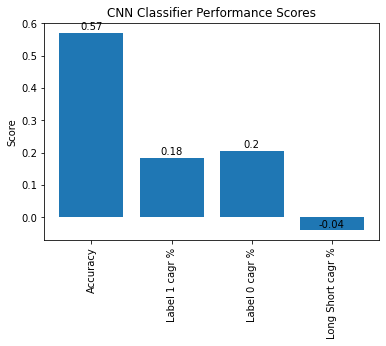

In [52]:
import matplotlib.pyplot as plt


# Create a list of metric names
metrics = ['Accuracy', 'Label 1 cagr %', 'Label 0 cagr %', 'Long Short cagr %']

cagr_Long, cagr_Short, cagr_LongShort = evaluate_model(model3, concatenated_tensor, Yact)

# Create a list of metric scores
scores = [accuracy, cagr_Long , cagr_Short , cagr_LongShort ]

# Plot the bar chart
plt.bar(metrics, scores)

plt.xticks(rotation='vertical')

# Display the score numbers on the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, str(round(score, 2)), ha='center')

# Set the y-axis label
plt.ylabel('Score')

# Set the plot title
plt.title('CNN Classifier Performance Scores')

# Display the plot
plt.show()

# Appendix: Workings for future models